## Name: Yusuf Muhammad Musa
## Fellow Id: FE/23/86388955

# 🧾 Applied Learning Assignment 2: Data Processing of Business Funding Data in Nigeria
🧠 Objective

* The objective of this task is to explore, clean, and preprocess the Business Funding Data in Nigeria to make it ready for deeper analysis. This involves identifying data quality issues such as missing values, inconsistent formatting, and outliers, and applying appropriate transformations.

# 🧩 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 📂 2. Load the Dataset

In [3]:
# Try multiple encodings to avoid UnicodeDecodeError
file_path = "Business Funding Data.csv"

encodings = ['utf-8', 'latin1', 'ISO-8859-1']
for enc in encodings:
    try:
        df = pd.read_csv(file_path, encoding=enc)
        print(f"✅ Loaded successfully with encoding: {enc}")
        break
    except UnicodeDecodeError:
        continue

df.head()


✅ Loaded successfully with encoding: latin1


,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,NaN,2024-03-14T01:00:00+01:00,NaN,NaN,[],NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,NaN,2024-05-31T02:00:00+02:00,NaN,NaN,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,NaN,2024-07-24T02:00:00+02:00,NaN,NaN,"[""private_equity""]",NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,NaN,2024-05-01T02:00:00+02:00,NaN,NaN,[],stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,NaN,2024-04-11T02:00:00+02:00,NaN,NaN,[],chevychasetrust.com,1.0,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...


# 🔍 3. Explore the Data

In [4]:
# Basic structure
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Display sample rows
df.sample(5)


Shape: (26, 11)

Columns:
 Index(['Website Domain', 'Effective date', 'Found At', 'Financing Type',
       'Financing Type Normalized', 'Categories', 'Investors',
       'Investors Count', 'Amount', 'Amount Normalized', 'Source Urls'],
      dtype='object')

Data types:
 Website Domain                object
Effective date                object
Found At                      object
Financing Type                object
Financing Type Normalized     object
Categories                    object
Investors                     object
Investors Count              float64
Amount                        object
Amount Normalized              int64
Source Urls                   object
dtype: object

Missing values:
 Website Domain                0
Effective date               20
Found At                      0
Financing Type               18
Financing Type Normalized    18
Categories                    0
Investors                    13
Investors Count              13
Amount                        0
A

,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
20,topicflow.com,NaN,2024-06-25T02:00:00+02:00,Seed,seed,"[""seed"", ""venture""]",NaN,NaN,CAD$2.5M,1823000,https://www.finsmes.com/2024/06/topicflow-rais...
3,canva.com,NaN,2024-05-01T02:00:00+02:00,NaN,NaN,[],stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
14,sparelabs.com,NaN,2024-06-05T02:00:00+02:00,NaN,NaN,[],NaN,NaN,$10M,10000000,https://www.finsmes.com/2024/06/spare-receives...
23,gaiia.com,2024-06-27T02:00:00+02:00,2024-06-27T02:00:00+02:00,Series A,series_a,"[""series_a"", ""venture""]",inovia.vc,1.0,US$13.2M,13200000,https://financialpost.com/globe-newswire/gaiia...
24,sinnstudio.com,NaN,2024-05-22T02:00:00+02:00,NaN,NaN,"[""private_equity"", ""venture""]",NaN,NaN,$2.5M,2500000,https://www.finsmes.com/2024/05/sinn-studio-ra...


✍️ Observations from Exploring the Data

- The dataset contains funding information such as website domains, funding type, categories, investors, and normalized funding amounts.

- Some text columns have inconsistent casing and extra spaces.

- The column Amount has currency symbols, while Amount Normalized provides clean numeric data.

- There are missing values in some categorical fields like Categories and Investors.

- The dataset includes potential outliers in funding amounts (e.g., billion-dollar investments).

# 🧹 4. Data Cleaning and Preprocessing

In [12]:
# --- Standardize column names ---
df.columns = df.columns.str.strip().str.title()

# --- Strip and format text fields safely ---
df = df.apply(lambda col: col.map(lambda x: x.strip().title() if isinstance(x, str) else x))

# --- Handle missing values (future-proof way) ---
df = df.fillna({
    'Categories': 'Unknown',
    'Investors': 'Not Disclosed'
})

# --- Convert date columns ---
for col in ['Effective Date', 'Found At']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# --- Convert Amount Normalized to numeric ---
df['Amount Normalized'] = pd.to_numeric(df['Amount Normalized'], errors='coerce')

# --- Drop duplicates ---
df = df.drop_duplicates()

# --- Confirm results ---
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype                    
---  ------                     --------------  -----                    
 0   Website Domain             26 non-null     object                   
 1   Effective Date             6 non-null      datetime64[ns, UTC+02:00]
 2   Found At                   2 non-null      datetime64[ns, UTC+01:00]
 3   Financing Type             8 non-null      object                   
 4   Financing Type Normalized  8 non-null      object                   
 5   Categories                 26 non-null     object                   
 6   Investors                  26 non-null     object                   
 7   Investors Count            13 non-null     float64                  
 8   Amount                     26 non-null     object                   
 9   Amount Normalized          26 non-null     int64                    
 10  Sour

# 📊 5. Handle Outliers (IQR Method)

In [13]:
target_col = 'Amount Normalized'

Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1

df = df[(df[target_col] >= Q1 - 1.5 * IQR) & (df[target_col] <= Q3 + 1.5 * IQR)]

print(f"Data shape after outlier removal: {df.shape}")


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.Data shape after outlier removal: (21, 11)



# 📈 6. Visualize Cleaned Data

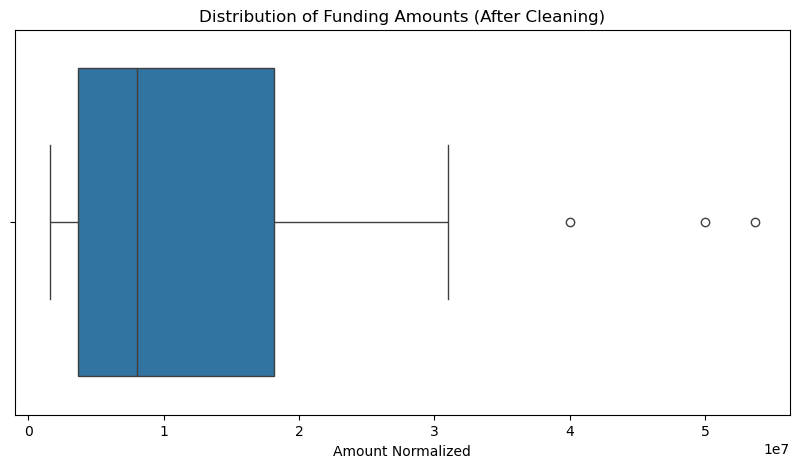

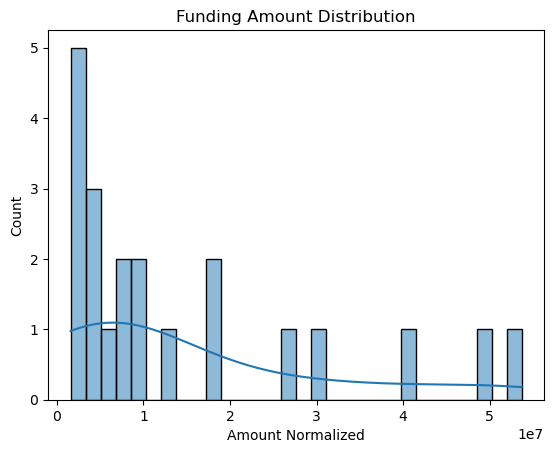

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Amount Normalized'])
plt.title('Distribution of Funding Amounts (After Cleaning)')
plt.show()

sns.histplot(df['Amount Normalized'], bins=30, kde=True)
plt.title('Funding Amount Distribution')
plt.show()


### ✍️ Justifications for Each Step (Markdown cell)

- Encoding Handling: Different encodings were tested to avoid UnicodeDecodeError    when reading the dataset.

- Text Cleaning: Used .strip() and .title() to ensure uniform case and remove       trailing spaces.

-  Missing Values: Filled missing categorical data with “Unknown” or “Not            Disclosed” to preserve data integrity.

- Date Conversion: Ensured correct datetime format for time-based analysis.

- Outlier Removal: Applied the Interquartile Range (IQR) method to detect and       remove extreme funding values that could distort analysis.

- Normalization: Used the already cleaned numeric column Amount Normalized for  financial computations.